In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import torch
import os
import random
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [20]:
# 随机生成数据
X_data = torch.linspace(-math.pi,math.pi,2000).reshape(-1,1)
y = torch.sin(X_data).reshape(-1,1).reshape(-1,1)
# 对X进行维度扩展
X = torch.cat([X_data**i for i in range(5)],dim=1)
# 必须进行归一化处理，不然后续计算会爆炸
X = (X-X.mean())/X.std()

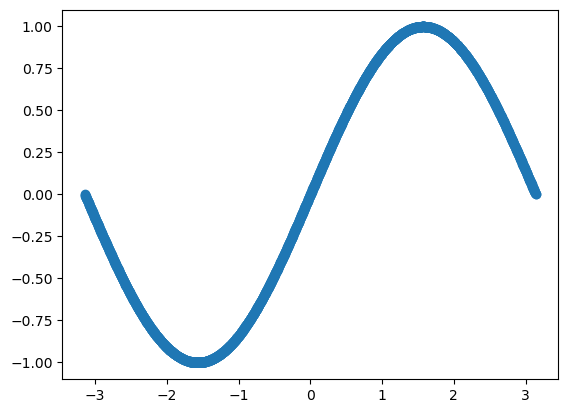

In [21]:
plt.scatter(X_data,y)

In [22]:
# 数据加载器
def data_iter(batch_size, data, labels):
    num_examples = len(data)
    indices = list(range(num_examples))
    # 随机读取样本
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield data[batch_indices], labels[batch_indices]

In [23]:

# 定义模型
# 此次是五次模型
def linear(X,a,b):
    return torch.matmul(X,a)+b
def loss(y,y_hat):
    return (y_hat-y.reshape(y_hat.shape))**2/2
def sgd(params,lr,batchsize):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad / batchsize
            param.grad.zero_()
def backwards(X,y,y_hat,a,b):
    y_hat_grad = y_hat-y
    a_grad = torch.matmul(X.T,y_hat_grad)
    b_grad = y_hat_grad.sum(dim=0)
    a.grad = a_grad
    b.grad = b_grad

In [24]:
model = linear  # 模型
lr = 0.03   # 学习率
num_epochs = 500    # 训练次数
batch_size = 10 # 一次读取的数据量

In [25]:
# 初始化模型参数
# 模型为 y = ax + b
a = torch.normal(0, 0.01, size=(5,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [26]:
for epoch in range(num_epochs): #训练模型
    for X_train,y_train in data_iter(batch_size,X,y):
        y_hat = model(X_train,a,b)
        train_loss = loss(y_hat,y_train)
        backwards(X_train,y_train,y_hat,a,b)
        #backward(X,y,y_hat,a,b)
        sgd([a,b],lr,batch_size)
    with torch.no_grad():   # 模型评估
        train_l = loss(model(X,a,b), y)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.190718
epoch 2, loss 0.185138
epoch 3, loss 0.180388
epoch 4, loss 0.175988
epoch 5, loss 0.172108
epoch 6, loss 0.167575
epoch 7, loss 0.162935
epoch 8, loss 0.158559
epoch 9, loss 0.154799
epoch 10, loss 0.150922
epoch 11, loss 0.147848
epoch 12, loss 0.144329
epoch 13, loss 0.139353
epoch 14, loss 0.135714
epoch 15, loss 0.132319
epoch 16, loss 0.129017
epoch 17, loss 0.125576
epoch 18, loss 0.123066
epoch 19, loss 0.119284
epoch 20, loss 0.117104
epoch 21, loss 0.113674
epoch 22, loss 0.110483
epoch 23, loss 0.107895
epoch 24, loss 0.106458
epoch 25, loss 0.102671
epoch 26, loss 0.099840
epoch 27, loss 0.097558
epoch 28, loss 0.095299
epoch 29, loss 0.093534
epoch 30, loss 0.090043
epoch 31, loss 0.088054
epoch 32, loss 0.086725
epoch 33, loss 0.083666
epoch 34, loss 0.081900
epoch 35, loss 0.079547
epoch 36, loss 0.078423
epoch 37, loss 0.075429
epoch 38, loss 0.073799
epoch 39, loss 0.071922
epoch 40, loss 0.070460
epoch 41, loss 0.068011
epoch 42, loss 0.066394
e

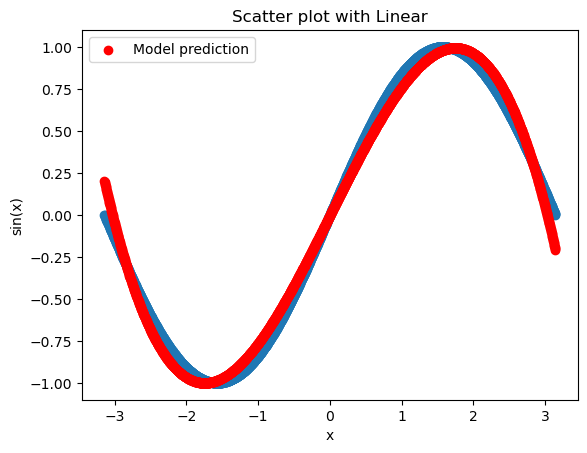

In [32]:
y_pred = model(X,a,b).detach().numpy()
plt.scatter(X_data,y)
# 绘制模型的预测线
plt.scatter(X_data, y_pred, color='red', label='Model prediction')
# 添加标题和图例
plt.title('Scatter plot with Linear')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
# 显示图表
plt.show()